In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
data_ads = pd.read_csv("datasets/ads/Advertising.csv")

In [39]:
data_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
len(data_ads)

200

In [6]:
data_ads["corrn"] = (data_ads["TV"] - np.mean(data_ads["TV"]))* (data_ads["Sales"] - np.mean(data_ads["Sales"]))

In [7]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn
0,230.1,37.8,69.2,22.1,670.896956
1,44.5,39.3,45.1,10.4,371.460206
2,17.2,45.9,69.3,9.3,613.181206
3,151.5,41.3,58.5,18.5,19.958456
4,180.8,10.8,58.4,12.9,-37.892794


In [9]:
data_ads["corr1"] = (data_ads["TV"] - np.mean(data_ads["TV"]))**2

In [10]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corr1
0,230.1,37.8,69.2,22.1,670.896956,6898.548306
1,44.5,39.3,45.1,10.4,371.460206,10514.964306
2,17.2,45.9,69.3,9.3,613.181206,16859.074806
3,151.5,41.3,58.5,18.5,19.958456,19.869306
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806


In [11]:
data_ads["corr2"] = (data_ads["Sales"] - np.mean(data_ads["Sales"]))**2

In [12]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corr1,corr2
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006


In [30]:
corr_p = sum(data_ads["corrn"])/np.sqrt(sum(data_ads["corr1"])* sum(data_ads["corr2"]))##Correlación de pearson

In [31]:
corr_p

0.782224424861606

In [32]:
def corr_coeff(df, var1, var2):##Correlación de pearson en una función
    df["corrn"] = (df[var1] - np.mean(df[var1])) * (df[var2] - np.mean(df[var2]))
    df["corr1"] = (df[var1] - np.mean(df[var1]))**2
    df["corr2"] = (df[var2] - np.mean(df[var2]))**2
    corr_p = sum(df["corrn"])/np.sqrt(sum(df["corr1"])* sum(df["corr2"]))
    return corr_p

In [33]:
corr_coeff(data_ads, "TV", "Sales")

0.782224424861606

In [40]:
cols = data_ads.columns.values

In [42]:
for x in cols:
    for y in cols:
        print(x + ", " + y + ": " + str(corr_coeff(data_ads, x, y)))

TV, TV: 1.0
TV, Radio: 0.05480866446583006
TV, Newspaper: 0.056647874965056993
TV, Sales: 0.782224424861606
Radio, TV: 0.05480866446583006
Radio, Radio: 1.0
Radio, Newspaper: 0.35410375076117545
Radio, Sales: 0.576222574571055
Newspaper, TV: 0.056647874965056993
Newspaper, Radio: 0.35410375076117545
Newspaper, Newspaper: 1.0
Newspaper, Sales: 0.22829902637616534
Sales, TV: 0.782224424861606
Sales, Radio: 0.576222574571055
Sales, Newspaper: 0.22829902637616534
Sales, Sales: 1.0


Text(0.5, 1.0, 'Gasto en TV vs Ventas del Producto')

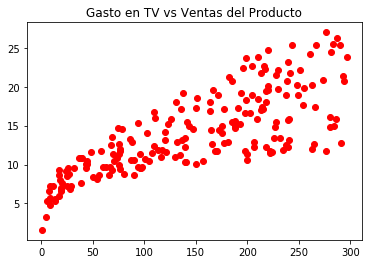

In [47]:
plt.plot(data_ads["TV"], data_ads["Sales"], "ro")## r->red color o->grafica
plt.title("Gasto en TV vs Ventas del Producto")

Text(0.5, 1.0, 'Gasto en Radio vs Ventas del Producto')

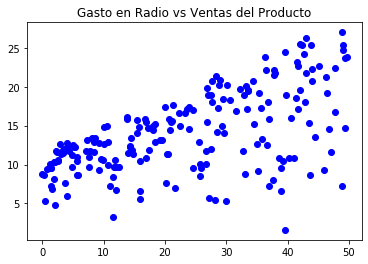

In [51]:
plt.plot(data_ads["Radio"], data_ads["Sales"], "bo")## r->red color o->grafica
plt.title("Gasto en Radio vs Ventas del Producto")

Text(0.5, 1.0, 'Gasto en Periódico vs Ventas del Producto')

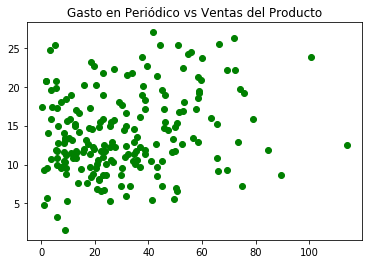

In [52]:
plt.plot(data_ads["Newspaper"], data_ads["Sales"], "go")## r->red color o->grafica
plt.title("Gasto en Periódico vs Ventas del Producto")

In [55]:
data_ads.corr()##Correlación en un sólo comando

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


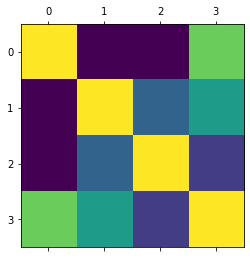

In [56]:
plt.matshow(data_ads.corr())